In [1]:
#Primero se importan las librerías necesarias
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
#Se importan los datos del archivo .csv
bolsa = pd.read_csv(r"C:\Users\jap25\OneDrive\Documentos\git workspace\DataScienceCourseTasks\Task #6 - Results\Entregable 6\fundamentals.csv")
bolsa.head()

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,Cost of Revenue,Current Ratio,Deferred Asset Charges,Deferred Liability Charges,Depreciation,Earnings Before Interest and Tax,Earnings Before Tax,Effect of Exchange Rate,Equity Earnings/Loss Unconsolidated Subsidiary,Fixed Assets,Goodwill,Gross Margin,Gross Profit,Income Tax,Intangible Assets,Interest Expense,Inventory,Investments,Liabilities,Long-Term Debt,Long-Term Investments,Minority Interest,Misc. Stocks,Net Borrowings,Net Cash Flow,Net Cash Flow-Operating,Net Cash Flows-Financing,Net Cash Flows-Investing,Net Income,Net Income Adjustments,Net Income Applicable to Common Shareholders,Net Income-Cont. Operations,Net Receivables,Non-Recurring Items,Operating Income,Operating Margin,Other Assets,Other Current Assets,Other Current Liabilities,Other Equity,Other Financing Activities,Other Investing Activities,Other Liabilities,Other Operating Activities,Other Operating Items,Pre-Tax Margin,Pre-Tax ROE,Profit Margin,Quick Ratio,Research and Development,Retained Earnings,Sale and Purchase of Stock,"Sales, General and Admin.",Short-Term Debt / Current Portion of Long-Term Debt,Short-Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,1.330000e+09,0.0,127000000.0,1.049900e+10,78.0,0.000000e+00,223000000.0,1.001000e+09,-1.813000e+09,-2.445000e+09,0.0,0.0,1.340200e+10,0.000000e+00,58.0,1.435600e+10,-5.690000e+08,8.690000e+08,632000000.0,5.800000e+08,3.060000e+08,4.730000e+08,7.116000e+09,0.0,0.0,0.0,-1.020000e+09,197000000.0,1.285000e+09,4.830000e+08,-1.571000e+09,-1.876000e+09,2.050000e+09,-1.876000e+09,-4.084000e+09,1.124000e+09,3.860000e+08,1.480000e+08,1.0,2.167000e+09,6.260000e+08,4.524000e+09,-2.980000e+09,1.509000e+09,11000000.0,1.514700e+10,-141000000.0,8.450000e+08,10.0,31.0,8.0,72.0,0.0,-9.462000e+09,0.000000e+00,1.297700e+10,1.419000e+09,3.412000e+09,2.351000e+10,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,2.175000e+09,0.0,5000000.0,1.101900e+10,104.0,0.000000e+00,935000000.0,1.020000e+09,-1.324000e+09,-2.180000e+09,0.0,0.0,1.925900e+10,4.086000e+09,59.0,1.572400e+10,-3.460000e+08,2.311000e+09,856000000.0,1.012000e+09,-1.181000e+09,-2.350000e+08,1.535300e+10,0.0,0.0,0.0,2.208000e+09,660000000.0,6.750000e+08,3.799000e+09,-3.814000e+09,-1.834000e+09,1.873000e+09,-1.834000e+09,-4.489000e+09,1.560000e+09,5.590000e+08,1.399000e+09,5.0,2.299000e+09,1.465000e+09,7.385000e+09,-2.032000e+09,1.711000e+09,481000000.0,1.491500e+10,-56000000.0,8.530000e+08,8.0,80.0,7.0,96.0,0.0,-1.129600e+10,0.000000e+00,1.291300e+10,1.446000e+09,8.111000e+09,4.227800e+10,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,1.768000e+09,0.0,7000000.0,1.562000e+10,88.0,0.000000e+00,829000000.0,1.342000e+09,4.099000e+09,3.212000e+09,0.0,0.0,2.308400e+10,4.091000e+09,63.0,2.703000e+10,3.300000e+08,2.240000e+09,887000000.0,1.004000e+09,1.799000e+09,-1.026000e+09,1.604300e+10,0.0,0.0,0.0,1.700000e+08,-146000000.0,3.080000e+09,-3.150000e+08,-2.911000e+09,2.882000e+09,5.420000e+08,2.882000e+09,2.882000e+09,1.771000e+09,8.000000e+08,4.249000e+09,10.0,2.060000e+09,8.980000e+08,7.059000e+09,-4.559000e+09,8.170000e+08,601000000.0,1.092800e+10,-500000000.0,1.295000e+09,8.0,159.0,7.0,80.0,0.0,-8.562000e+09,-1.052000e+09,2.068600e+10,1.677000e+09,6.309000e+09,4.322

In [3]:
#Procedemos a homologar y limpiar los nombres de las columnas
bolsa.columns = bolsa.columns.str.strip().str.lower().str.replace(' ', '_')
bolsa.drop('unnamed:_0', axis = 1, inplace= True)
bolsa['ticker_symbol'] = bolsa['ticker_symbol'].str.lower().str.strip()
bolsa['period_ending'] = pd.to_datetime(bolsa['period_ending'], format='%Y-%m-%d')

#Procedemos a homologar y limpiar los registros del dataframe
string_columns = list(bolsa.dtypes[bolsa.dtypes == 'object'].index)
for col in string_columns:
    bolsa[col] = bolsa[col].str.strip().str.lower().str.replace(' ', '_')
    
#Se puede observar que todas sus columnas son de tipo decimal excepto por Period Ending, Ticker Symbol y la primera columna
#que a primera vista parece ser de índices, por ende, podremos prescindir de ella, ya que, la misma importación crea sus 
#índices
print(bolsa.dtypes)

ticker_symbol                                                  object
period_ending                                          datetime64[ns]
accounts_payable                                              float64
accounts_receivable                                           float64
add'l_income/expense_items                                    float64
after_tax_roe                                                 float64
capital_expenditures                                          float64
capital_surplus                                               float64
cash_ratio                                                    float64
cash_and_cash_equivalents                                     float64
changes_in_inventories                                        float64
common_stocks                                                 float64
cost_of_revenue                                               float64
current_ratio                                                 float64
deferred_asset_charg

In [4]:
"""En este punto podremos definir a que se refiere cada columna:
Ticker Symbol: Símbolo de Cotización
Period Ending: Fin del Período
Accounts Payable: Cuentas por Pagar
Accounts Receivable: Cuentas por Cobrar
Add'l income/expense items: Elementos Adicionales de Ingresos/Gastos
After Tax ROE: ROE después de Impuestos (Retorno sobre el Capital)
Capital Expenditures: Gastos de Capital
Capital Surplus: Superávit de Capital
Cash Ratio: Ratio de Liquidez
Cash and Cash Equivalents: Efectivo y Equivalentes de Efectivo
Changes in Inventories: Cambios en Inventarios
Common Stocks: Acciones Comunes
Cost of Revenue: Costo de Ingresos
Current Ratio: Ratio de Liquidez Corriente
Deferred Asset Charges: Cargos por Activos Diferidos
Deferred Liability Charges: Cargos por Pasivos Diferidos
Depreciation: Depreciación
Earnings Before Interest and Tax: Ganancias antes de Intereses e Impuestos
Earnings Before Tax: Ganancias antes de Impuestos
Effect of Exchange Rate: Efecto del Tipo de Cambio
Equity Earnings/Loss Unconsolidated Subsidiary: Ganancias/Pérdidas de Capital de Filial No Consolidada
Fixed Assets: Activos Fijos
Goodwill: Fondo de Comercio
Gross Margin: Margen Bruto
Gross Profit: Beneficio Bruto
Income Tax: Impuesto sobre la Renta
Intangible Assets: Activos Intangibles
Interest Expense: Gastos por Intereses
Inventory: Inventario
Investments: Inversiones
Liabilities: Pasivos
Long-Term Debt: Deuda a Largo Plazo
Long-Term Investments: Inversiones a Largo Plazo
Minority Interest: Interés Minoritario
Misc. Stocks: Acciones Diversas
Net Borrowings: Préstamos Netos
Net Cash Flow: Flujo de Caja Neto
Net Cash Flow-Operating: Flujo de Caja Neto de Operaciones
Net Cash Flows-Financing: Flujos de Caja Netos de Financiamiento
Net Cash Flows-Investing: Flujos de Caja Netos de Inversión
Net Income: Ingreso Neto
Net Income Adjustments: Ajustes al Ingreso Neto
Net Income Applicable to Common Shareholders: Ingreso Neto Aplicable a Accionistas Comunes
Net Income-Cont. Operations: Ingreso Neto de Operaciones Continuas
Net Receivables: Cuentas por Cobrar Netas
Non-Recurring Items: Elementos No Recurrentes
Operating Income: Ingreso Operativo
Operating Margin: Margen Operativo
Other Assets: Otros Activos
Other Current Assets: Otros Activos Corrientes
Other Current Liabilities: Otras Pasivos Corrientes
Other Equity: Otras Participaciones en el Capital
Other Financing Activities: Otras Actividades de Financiamiento
Other Investing Activities: Otras Actividades de Inversión
Other Liabilities: Otros Pasivos
Other Operating Activities: Otras Actividades Operativas
Other Operating Items: Otros Elementos Operativos
Pre-Tax Margin: Margen antes de Impuestos
Pre-Tax ROE: ROE antes de Impuestos
Profit Margin: Margen de Beneficio
Quick Ratio: Ratio de Prueba Ácida
Research and Development: Investigación y Desarrollo
Retained Earnings: Ganancias Retenidas
Sale and Purchase of Stock: Venta y Compra de Acciones
Sales, General and Admin.: Ventas, General y Administración
Short-Term Debt / Current Portion of Long-Term Debt: Deuda a Corto Plazo / Porción Corriente de la Deuda a Largo Plazo
Short-Term Investments: Inversiones a Corto Plazo
Total Assets: Activos Totales
Total Current Assets: Activos Corrientes Totales
Total Current Liabilities: Pasivos Corrientes Totales
Total Equity: Patrimonio Total
Total Liabilities: Pasivos Totales
Total Liabilities & Equity: Total de Pasivos y Patrimonio
Total Revenue: Ingresos Totales
Treasury Stock: Acciones de Tesorería
For Year: Para el Año
Earnings Per Share: Ganancias por Acción
Estimated Shares Outstanding: Acciones Estimadas en Circulación

E identificamos como variables objetivo:
Para el siguiente ejercicio identifico como importante el margen operativo y como variables relevantes para su evaluación las 
siguientes:

* Gross Margin: Margen Bruto
* Research and Development: Investigación y Desarrollo
* Total Revenue: Ingresos Totales
* Total Assets: Activos Totales
* Total Liabilities: Pasivos Totales"""

bolsa.head()

,ticker_symbol,period_ending,accounts_payable,accounts_receivable,add'l_income/expense_items,after_tax_roe,capital_expenditures,capital_surplus,cash_ratio,cash_and_cash_equivalents,changes_in_inventories,common_stocks,cost_of_revenue,current_ratio,deferred_asset_charges,deferred_liability_charges,depreciation,earnings_before_interest_and_tax,earnings_before_tax,effect_of_exchange_rate,equity_earnings/loss_unconsolidated_subsidiary,fixed_assets,goodwill,gross_margin,gross_profit,income_tax,intangible_assets,interest_expense,inventory,investments,liabilities,long-term_debt,long-term_investments,minority_interest,misc._stocks,net_borrowings,net_cash_flow,net_cash_flow-operating,net_cash_flows-financing,net_cash_flows-investing,net_income,net_income_adjustments,net_income_applicable_to_common_shareholders,net_income-cont._operations,net_receivables,non-recurring_items,operating_income,operating_margin,other_assets,other_current_assets,other_current_liabilities,other_equity,other_financing_activities,other_investing_activities,other_liabilities,other_operating_activities,other_operating_items,pre-tax_margin,pre-tax_roe,profit_margin,quick_ratio,research_and_development,retained_earnings,sale_and_purchase_of_stock,"sales,_general_and_admin.",short-term_debt_/_current_portion_of_long-term_debt,short-term_investments,total_assets,total_current_assets,total_current_liabilities,total_equity,total_liabilities,total_liabilities_&_equity,total_revenue,treasury_stock,for_year,earnings_per_share,estimated_shares_outstanding
0,aal,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,1.330000e+09,0.0,127000000.0,1.049900e+10,78.0,0.000000e+00,223000000.0,1.001000e+09,-1.813000e+09,-2.445000e+09,0.0,0.0,1.340200e+10,0.000000e+00,58.0,1.435600e+10,-5.690000e+08,8.690000e+08,632000000.0,5.800000e+08,3.060000e+08,4.730000e+08,7.116000e+09,0.0,0.0,0.0,-1.020000e+09,197000000.0,1.285000e+09,4.830000e+08,-1.571000e+09,-1.876000e+09,2.050000e+09,-1.876000e+09,-4.084000e+09,1.124000e+09,3.860000e+08,1.480000e+08,1.0,2.167000e+09,6.260000e+08,4.524000e+09,-2.980000e+09,1.509000e+09,11000000.0,1.514700e+10,-141000000.0,8.450000e+08,10.0,31.0,8.0,72.0,0.0,-9.462000e+09,0.000000e+00,1.297700e+10,1.419000e+09,3.412000e+09,2.351000e+10,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,aal,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,2.175000e+09,0.0,5000000.0,1.101900e+10,104.0,0.000000e+00,935000000.0,1.020000e+09,-1.324000e+09,-2.180000e+09,0.0,0.0,1.925900e+10,4.086000e+09,59.0,1.572400e+10,-3.460000e+08,2.311000e+09,856000000.0,1.012000e+09,-1.181000e+09,-2.350000e+08,1.535300e+10,0.0,0.0,0.0,2.208000e+09,660000000.0,6.750000e+08,3.799000e+09,-3.814000e+09,-1.834000e+09,1.873000e+09,-1.834000e+09,-4.489000e+09,1.560000e+09,5.590000e+08,1.399000e+09,5.0,2.299000e+09,1.465000e+09,7.385000e+09,-2.032000e+09,1.711000e+09,481000000.0,1.491500e+10,-56000000.0,8.530000e+08,8.0,80.0,7.0,96.0,0.0,-1.129600e+10,0.000000e+00,1.291300e+10,1.446000e+09,8.111000e+09,4.227800e+10,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,aal,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,1.768000e+09,0.0,7000000.0,1.562000e+10,88.0,0.000000e+00,829000000.0,1.342000e+09,4.099000e+09,3.212000e+09,0.0,0.0,2.308400e+10,4.091000e+09,63.0,2.703000e+10,3.300000e+08,2.240000e+09,887000000.0,1.004000e+09,1.799000e+09,-1.026000e+09,1.604300e+10,0.0,0.0,0.0,1.700000e+08,-146000000.0,3.080000e+09,-3.150000e+08,-2.911000e+09,2.882000e+09,5.420000e+08,2.882000e+09,2.882000e+09,1.771000e+09,8.000000e+08,4.249000e+09,10.0,2.060000e+09,8.980000e+08,7.059000e+09,-4.559000e+09,8.170000e+08,601000000.0,1.092800e+10,-500000000.0,1.295000e+09,8.0,159.0,7.0,80.0,0.0,-8.562000e+09,-1.052000e+09,2.068600e+10,1.677000e+09,6.309000e+09,4.322500e+10,1.175000e

In [5]:
#Verificamos campos vacíos y analizamos si es posible completar
bolsa.isnull().sum()

#Notamos que no existen datos faltantes que tengan relación con nuestras variables objetivo, por ende, seguimos

ticker_symbol                                            0
period_ending                                            0
accounts_payable                                         0
accounts_receivable                                      0
add'l_income/expense_items                               0
after_tax_roe                                            0
capital_expenditures                                     0
capital_surplus                                          0
cash_ratio                                             299
cash_and_cash_equivalents                                0
changes_in_inventories                                   0
common_stocks                                            0
cost_of_revenue                                          0
current_ratio                                          299
deferred_asset_charges                                   0
deferred_liability_charges                               0
depreciation                                            

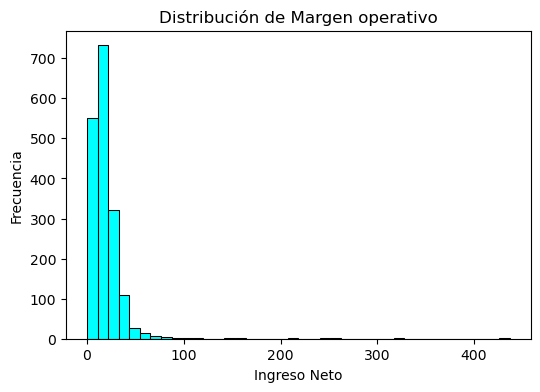

In [6]:
# Procedemos a graficar los históricos de cada variable objetivo
# Histograma de la primera variable objetivo "total_revenue"

plt.figure(figsize=(6, 4))

sns.histplot(bolsa.operating_margin, bins=40, color='cyan', alpha=1)

plt.ylabel('Frecuencia')

plt.xlabel('Ingreso Neto')

plt.title('Distribución de Margen operativo')

plt.show()

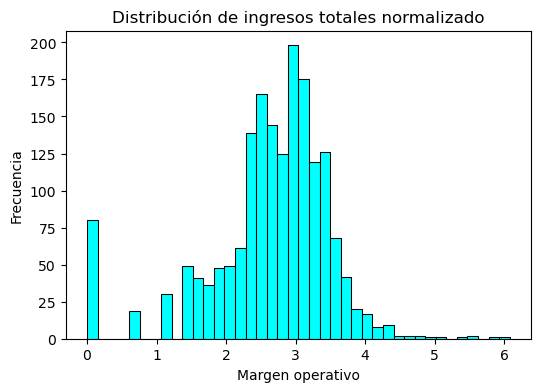

In [7]:
#Dado que en ambos gráficos se observa una distribución sesgada se procede a aplicar una normalización logaritmica y con ello,
#luego lograr obtener una estimación más precisa de las variables
#procedemos a graficar los ingresos totales

log_price = np.log1p(bolsa.operating_margin)

plt.figure(figsize=(6, 4))

sns.histplot(log_price, bins=40, color='cyan', alpha=1)

plt.ylabel('Frecuencia')

plt.xlabel('Margen operativo')

plt.title('Distribución de ingresos totales normalizado')

plt.show()

In [8]:
np.random.seed(2)

n = len(bolsa)



n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)



idx = np.arange(n)
np.random.shuffle(idx)


df_shuffled = bolsa.iloc[idx]


df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [9]:
y_train_orig = df_train.operating_margin.values
y_val_orig = df_val.operating_margin.values
y_test_orig = df_test.operating_margin.values


y_train = np.log1p(df_train.operating_margin.values)
y_val = np.log1p(df_val.operating_margin.values)
y_test = np.log1p(df_test.operating_margin.values)


del df_train['operating_margin']
del df_val['operating_margin']
del df_test['operating_margin']

In [10]:
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0]) #Se crea columna ficticia con el dígito 1 para la matriz X y con la misma cantidad de filas de X
    X = np.column_stack([ones, X]) #Se añade la columna anteriormente creada a la matriz X
    
    XTX = X.T.dot(X) #Se calcula el producto entre X y XT
    XTX_inv = np.linalg.inv(XTX) #Se calcula la inversa de la matriz X con XTX
    w = XTX_inv.dot(X.T).dot(y) #Multiplica la inversa de XTX por la matriz transpuesta de X y por el vector de valores objetivo y, 
                                #para obtener los coeficientes de la regresión lineal
    
    return w[0], w[1:] #Retorna los elementos calculados, el primer elemento de w corresponde al término de sesgo (intercepto), 
                        #mientras que los elementos restantes corresponden a los coeficientes de las características.

In [11]:
df_train.head()

,ticker_symbol,period_ending,accounts_payable,accounts_receivable,add'l_income/expense_items,after_tax_roe,capital_expenditures,capital_surplus,cash_ratio,cash_and_cash_equivalents,changes_in_inventories,common_stocks,cost_of_revenue,current_ratio,deferred_asset_charges,deferred_liability_charges,depreciation,earnings_before_interest_and_tax,earnings_before_tax,effect_of_exchange_rate,equity_earnings/loss_unconsolidated_subsidiary,fixed_assets,goodwill,gross_margin,gross_profit,income_tax,intangible_assets,interest_expense,inventory,investments,liabilities,long-term_debt,long-term_investments,minority_interest,misc._stocks,net_borrowings,net_cash_flow,net_cash_flow-operating,net_cash_flows-financing,net_cash_flows-investing,net_income,net_income_adjustments,net_income_applicable_to_common_shareholders,net_income-cont._operations,net_receivables,non-recurring_items,operating_income,other_assets,other_current_assets,other_current_liabilities,other_equity,other_financing_activities,other_investing_activities,other_liabilities,other_operating_activities,other_operating_items,pre-tax_margin,pre-tax_roe,profit_margin,quick_ratio,research_and_development,retained_earnings,sale_and_purchase_of_stock,"sales,_general_and_admin.",short-term_debt_/_current_portion_of_long-term_debt,short-term_investments,total_assets,total_current_assets,total_current_liabilities,total_equity,total_liabilities,total_liabilities_&_equity,total_revenue,treasury_stock,for_year,earnings_per_share,estimated_shares_outstanding
611,f,2016-12-31,2.129600e+10,-2.855000e+09,1.794000e+09,16.0,-6.992000e+09,2.163000e+10,43.0,1.590500e+10,-815000000.0,4.100000e+07,1.354880e+11,120.0,9.705000e+09,6.910000e+08,8.717000e+09,7.690000e+09,6.796000e+09,-265000000.0,1.780000e+09,6.090100e+10,0.000000e+00,11.0,1.631200e+10,2.189000e+09,0.0,8.940000e+08,8.898000e+09,3.758500e+10,6.595000e+09,9.330100e+10,5.322800e+10,1.700000e+07,96000000.0,1.102800e+10,1.633000e+09,1.979200e+10,7.458000e+09,-2.535200e+10,4.596000e+09,3.544000e+09,4.596000e+09,6.376000e+09,5.736800e+10,0.0,4.116000e+09,5.656000e+09,3.368000e+09,1.931600e+10,-7.013000e+09,-49000000.0,-5.594500e+10,2.439500e+10,-1.000000e+06,0.000000e+00,4.0,23.0,3.0,110.0,0.0,1.563400e+10,-1.450000e+08,1.219600e+10,4.966900e+10,2.292200e+10,2.379510e+11,1.084610e+11,9.028100e+10,2.917000e+10,2.087810e+11,2.379510e+11,1.518000e+11,-1.122000e+09,NaN,NaN,NaN
505,duk,2013-12-31,3.382000e+09,-2.810000e+08,3.460000e+08,6.0,-5.526000e+09,3.936500e+10,18.0,1.501000e+09,-31000000.0,1.000000e+06,1.354500e+10,122.0,1.810000e+08,1.253900e+10,3.229000e+09,5.338000e+09,3.795000e+09,0.0,1.220000e+08,6.959700e+10,1.634000e+10,40.0,9.211000e+09,1.205000e+09,0.0,1.543000e+09,3.250000e+09,3.690000e+08,-1.780000e+08,3.815200e+10,5.522000e+09,7.800000e+07,0.0,9.330000e+08,7.700000e+07,6.382000e+09,-1.327000e+09,-4.978000e+09,2.665000e+09,1.385000e+09,2.665000e+09,2.590000e+09,3.005000e+09,399000000.0,4.854000e+09,1.262300e+10,2.716000e+09,2.319000e+09,-3.990000e+08,21000000.0,1.790000e+08,1.403600e+10,-4.180000e+08,2.668000e+09,17.0,9.0,12.0,84.0,0.0,2.363000e+09,-7.800000e+07,1.274000e+09,2.943000e+09,4.400000e+07,1.147790e+11,1.051600e+10,8.644000e+09,4.133000e+10,7.344900e+10,1.147790e+11,2.275600e+10,0.000000e+00,2013.0,3.77,7.068966e+08
502,dri,2015-05-31,4.040000e+08,-7.800000e+06,0.000000e+00,30.0,-2.965000e+08,0.000000e+00,45.0,5.359000e+08,-64500000.0,1.405900e+09,5.341500e+09,88.0,0.000000e+00,5.677000e+08,3.279000e+08,1.753000e+08,1.753000e+08,0.0,0.000000e+00,3.215800e+09,8.724000e+08,21.0,1.422500e+09,-2.110000e+07,574600000.0,0.000000e+00,1.639000e+08,9.700000e+06,1.490000e+07,1.452300e+09,0.000000e+00,0.000000e+00,0.0,-1.181400e+09,4.376000e+08,8.743000e+08,-1.784500e+09,-2.351000e+08,7.095000e+08,-2.500000e+08,7.095000e+08,1.964000e+08,2.354000e+08,62100000.0,3.676000e+08,2.755000e+08,1.212000e+08,7.777000e+08,-9.060000e+07,0.0,5.170000e+07,4.445000e+08,1.680700e+09,3.193000e+08,3.0,8.0,10.0,75.0,0.0,1.026000e+09,-3.426000e+08,6.735

In [12]:
base = ['gross_margin', 'research_and_development', 'total_revenue', 'total_assets', 'total_liabilities']

In [13]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [14]:
X_train = prepare_X(df_train)

In [15]:
y_train

array([1.38629436, 3.09104245, 1.79175947, ..., 2.89037176, 3.21887582,
       3.49650756])

In [16]:
b_0, b = train_linear_regression(X_train, y_train)

In [17]:
b_0

1.6534680772463632

In [18]:
b

array([ 2.14298613e-02, -2.20009701e-12, -2.33953819e-12,  6.90244432e-12,
       -8.27627375e-12])

In [19]:
y_train

array([1.38629436, 3.09104245, 1.79175947, ..., 2.89037176, 3.21887582,
       3.49650756])

In [20]:
y_pred = b_0 + X_train.dot(b)
y_pred

array([1.44856947, 2.64179563, 2.09874752, ..., 2.23452456, 3.55731116,
       3.80354096])

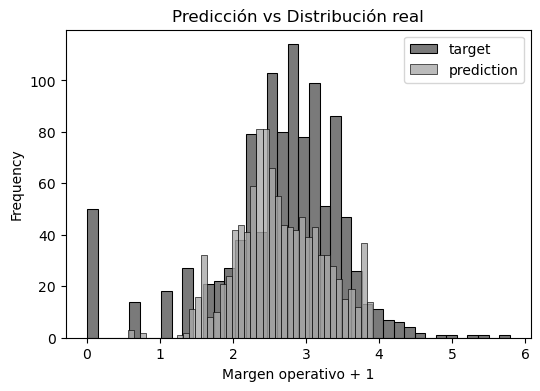

In [21]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Margen operativo + 1')
plt.title('Predicción vs Distribución real')

plt.show()

In [22]:
def margen_operativo(y, y_pred):
    error = y_pred - y
    margen = (error ** 2).mean()
    return np.sqrt(margen)

In [23]:
X_val = prepare_X(df_val)
y_pred = b_0 + X_val.dot(b)

In [24]:
margen_operativo(y_val, y_pred)

0.6562958821795425

In [25]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [26]:
X_train = prepare_X(df_train)

In [27]:
for r in [0, 0.001, 0.01, 0.1, 1, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    print('%5s, %.2f, %.2f, %.2f' % (r, w_0, w[2], w[4]))

    0, 1.65, -0.00, -0.00
0.001, 1.65, -0.00, -0.00
 0.01, 1.65, -0.00, -0.00
  0.1, 1.65, -0.00, -0.00
    1, 1.65, -0.00, -0.00
   10, 1.58, -0.00, -0.00


In [28]:
X_train = prepare_X(df_train)
b_0, b = train_linear_regression_reg(X_train, y_train, r=0.01)

y_pred = b_0 + X_train.dot(b)
print('Entrenamento', margen_operativo(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = b_0 + X_val.dot(b)
print('Validación', margen_operativo(y_val, y_pred))

Entrenamento 0.6724572594232738
Validación 0.6562986319116136


In [33]:
i = 2
ad = df_test.iloc[i].to_dict()
ad

{'ticker_symbol': 'vfc',
 'period_ending': Timestamp('2015-01-03 00:00:00'),
 'accounts_payable': 1588268000.0,
 'accounts_receivable': 854000.0,
 "add'l_income/expense_items": 1367000.0,
 'after_tax_roe': 19.0,
 'capital_expenditures': -234077000.0,
 'capital_surplus': 2993186000.0,
 'cash_ratio': 60.0,
 'cash_and_cash_equivalents': 971895000.0,
 'changes_in_inventories': -130540000.0,
 'common_stocks': 108215000.0,
 'cost_of_revenue': 6288190000.0,
 'current_ratio': 250.0,
 'deferred_asset_charges': 0.0,
 'deferred_liability_charges': 0.0,
 'depreciation': 274883000.0,
 'earnings_before_interest_and_tax': 1439091000.0,
 'earnings_before_tax': 1352366000.0,
 'effect_of_exchange_rate': -65461000.0,
 'equity_earnings/loss_unconsolidated_subsidiary': 0.0,
 'fixed_assets': 942181000.0,
 'goodwill': 1824956000.0,
 'gross_margin': 49.0,
 'gross_profit': 5993971000.0,
 'income_tax': 304861000.0,
 'intangible_assets': 2433552000.0,
 'interest_expense': 86725000.0,
 'inventory': 1482804000.0,


In [34]:
X_test = prepare_X(pd.DataFrame([ad]))[0]
y_pred = b_0 + X_test.dot(b)
suggestion = np.expm1(y_pred)
suggestion

13.997132938592099

El margen operativo sugerido fue de 13.997132938592099, sin embargo, el valor real es de 12.00, lo que representa una diferencia del 16.64%